In [ ]:
%cd drive/MyDrive/multimedia/hw1

In [31]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.exposure import rescale_intensity

# Q1

### Horizontal flip function

In [54]:
def flip_horizontally(img):
  flipped_img = cv2.flip(img, 1)
  return flipped_img

### Transpose function

In [60]:
def transpose(img):
  trans = np.transpose(img)
  return trans

### Crop function

In [56]:
def crop_25(img):
  row_25 = int(img.shape[0]*0.25)
  column_25 = int(img.shape[1]*0.25)
  cropped_img = img[row_25:img.shape[0]-row_25, column_25:img.shape[1]-column_25]
  return cropped_img

### All shift function

In [57]:
def shift_pixel(img, direction, n):
  shifted_img = np.zeros(img.shape)
  if direction == 'right':
    shifted_img[:,n:] = img[:, :img.shape[1]-n]
    shifted_img[:,:n] = img[:, img.shape[1]-n:]
  elif direction == 'left':
    shifted_img[:,:img.shape[1]-n] = img[:, n:]
    shifted_img[:,img.shape[1]-n:] = img[:, :n]
  elif direction == 'up':
    shifted_img[:img.shape[0]-n,:] = img[n:, :]
    shifted_img[img.shape[0]-n:,:] = img[:n, :]
  elif direction == 'down':
    shifted_img[n:,:] = img[:img.shape[0]-n, :]
    shifted_img[:n,:] = img[img.shape[0]-n:, :]
  elif direction == 'up_right':
    shifted_img = shift_pixel(img, 'up', n)
    shifted_img = shift_pixel(shifted_img, 'right', n)
  elif direction == 'up_left':
    shifted_img = shift_pixel(img, 'up', n)
    shifted_img = shift_pixel(shifted_img, 'left', n)
  elif direction == 'down_right':
    shifted_img = shift_pixel(img, 'down', n)
    shifted_img = shift_pixel(shifted_img, 'right', n)
  elif direction == 'down_left':
    shifted_img = shift_pixel(img, 'down', n)
    shifted_img = shift_pixel(shifted_img, 'left', n)
  else:
    print("Please detemine the direction!")
    return
  return shifted_img

## Question 1:

In [67]:
def call_all(img):
  flipped = flip_horizontally(img)
  transposed = transpose(img)
  cropped = crop_25(img)
  right = shift_pixel(img, 'right', 2)
  left = shift_pixel(img, 'left', 2)
  up = shift_pixel(img, 'up', 2)
  down = shift_pixel(img, 'down', 2)
  up_right = shift_pixel(img, 'up_right', 2)
  up_left = shift_pixel(img, 'up_left', 2)
  down_right = shift_pixel(img, 'down_right', 2)
  down_left = shift_pixel(img, 'down_left', 2)

  fig = plt.figure(figsize = (22, 22))
  fig.add_subplot(3, 4, 1)
  plt.title("Original Image")
  plt.imshow(img, cmap = 'gray')
  fig.add_subplot(3, 4, 2)
  plt.title("Flip horizontally")
  plt.imshow(flipped, cmap = 'gray')
  fig.add_subplot(3, 4, 3)
  plt.title("Transpose")
  plt.imshow(transposed, cmap = 'gray')
  fig.add_subplot(3, 4, 4)
  plt.title("Cropped")
  plt.imshow(cropped, cmap = 'gray')

  fig.add_subplot(3, 4, 5)
  plt.title("Right_shift")
  plt.imshow(right, cmap = 'gray')
  fig.add_subplot(3, 4, 6)
  plt.title("Left_shift")
  plt.imshow(left, cmap = 'gray')
  fig.add_subplot(3, 4, 7)
  plt.title("Up_shift")
  plt.imshow(up, cmap = 'gray')
  fig.add_subplot(3, 4, 8)
  plt.title("Down_shift")
  plt.imshow(down, cmap = 'gray')

  fig.add_subplot(3, 4, 9)
  plt.title("Diagonal_up_right")
  plt.imshow(up_right, cmap = 'gray')
  fig.add_subplot(3, 4, 10)
  plt.title("Diagonal_up_left")
  plt.imshow(up_left, cmap = 'gray')
  fig.add_subplot(3, 4, 11)
  plt.title("Diagonal_down_Right")
  plt.imshow(down_right, cmap = 'gray')
  fig.add_subplot(3, 4, 12)
  plt.title("Diagonal_down_left")
  plt.imshow(down_left, cmap = 'gray')
  plt.show()

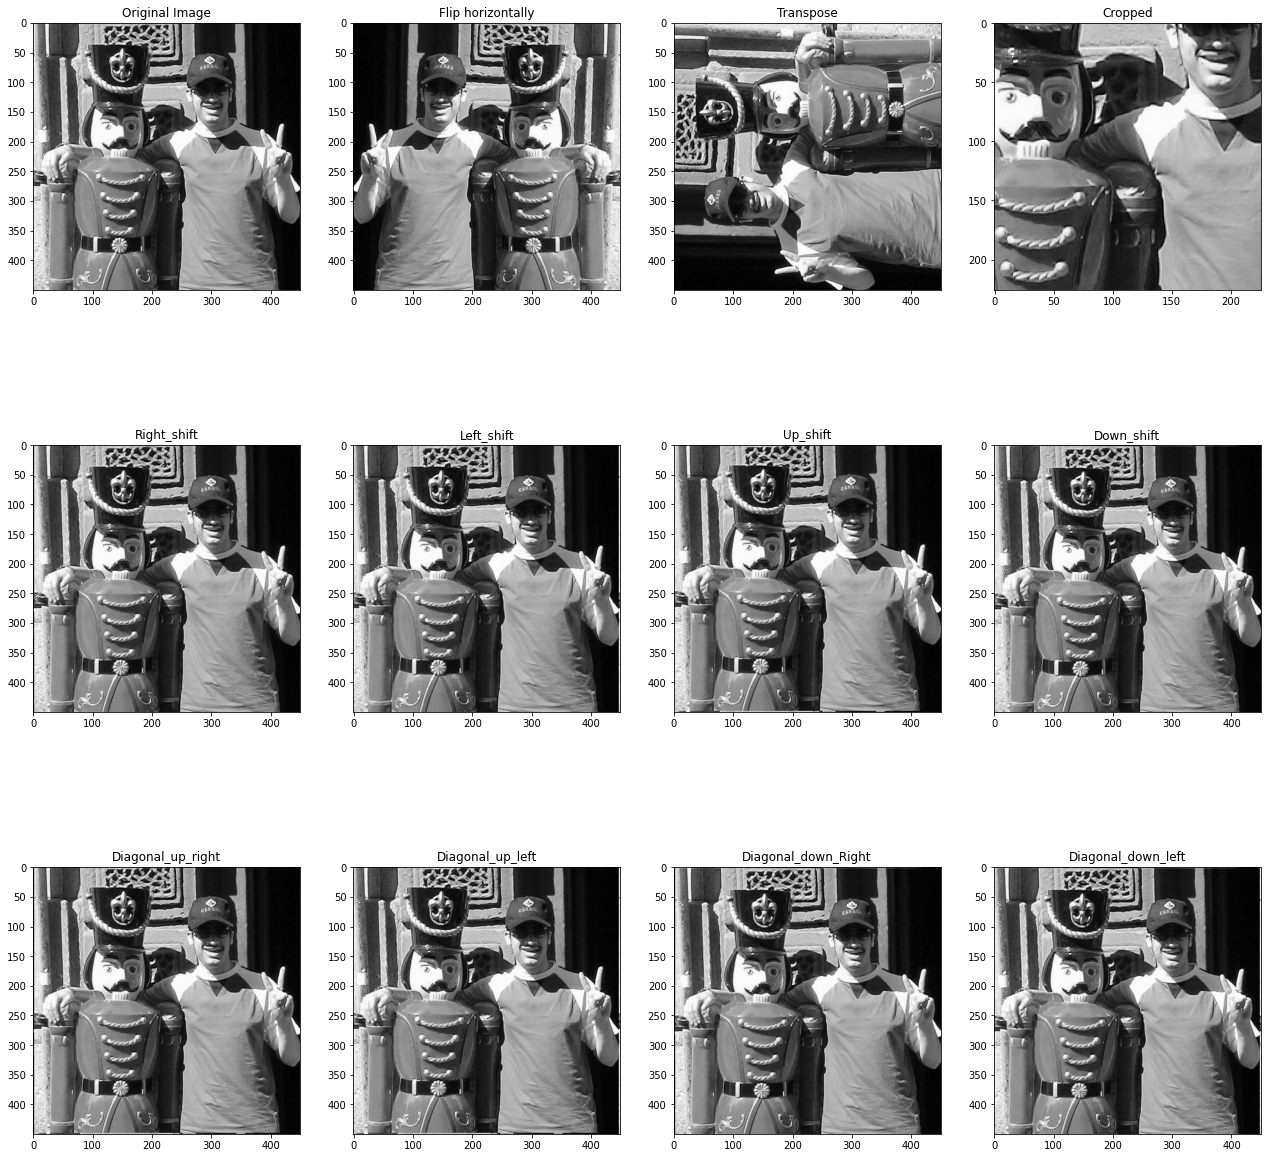

In [68]:
img = plt.imread('Hi.tif')
call_all(img)

# Q2

In [72]:
def HW1_MSE(img1, img2):
  return ((img1 - img2) ** 2).mean()

# Q3

In [73]:
def change_brightness_level(img, num):
  dec = img - num
  F = dec >= 0
  dec = F*dec
  return dec

In [74]:
dec_20 = change_brightness_level(img.astype(np.int32), 20)
mse_dec_20 = HW1_MSE(img.astype(np.int32), dec_20.astype(np.int32))
print(mse_dec_20)

359.4355851851852


In [75]:
right = shift_pixel(img, 'right', 2)
left = shift_pixel(img, 'left', 2)
mse_right = HW1_MSE(img.astype(np.int32), right.astype(np.int32))
mse_left = HW1_MSE(img.astype(np.int32), left.astype(np.int32))
print(mse_right)
print(mse_left)

1268.714261728395
1268.714261728395


# Q1

In [76]:
def imresize(img, scale_percent, interpolation):
  if interpolation == 'nearest':
    interpolation = cv2.INTER_NEAREST
  elif interpolation == 'bilinear':
    interpolation = cv2.INTER_LINEAR
  elif interpolation == 'bicubic':
    interpolation = cv2.INTER_CUBIC
  h = int(img.shape[0]*scale_percent / 100)
  w = int(img.shape[1]*scale_percent / 100)
  newdim = (h, w)
  resized = cv2.resize(img, newdim, interpolation = interpolation)
  return resized

In [77]:
resized_nearest = imresize(img, 80, 'nearest')
resized_bilinear = imresize(img, 80, 'bilinear')
resized_bicubic = imresize(img, 80, 'bicubic')

original_nearest = imresize(resized_nearest, 125, 'nearest')
original_bilinear = imresize(resized_bilinear, 125, 'bilinear')
original_bicubic = imresize(resized_bicubic, 125, 'bicubic')


mse_nearest = HW1_MSE(img.astype(np.int32), original_nearest.astype(np.int32))
mse_bilinear = HW1_MSE(img.astype(np.int32), original_bilinear.astype(np.int32))
mse_bicubic = HW1_MSE(img.astype(np.int32), original_bicubic.astype(np.int32))

print(mse_nearest)
print(mse_bilinear)
print(mse_bicubic)

592.2657283950617
63.0824987654321
18.400345679012347


# Q2

In [44]:
def imhist(im):
  # calculates normalized histogram of an image
	m, n = im.shape
	h = [0.0] * 256
	for i in range(m):
		for j in range(n):
			h[im[i, j]]+=1
	return np.array(h)/(m*n)

In [45]:
def cumsum(h):
	# finds cumulative sum of a numpy array, list
	return [sum(h[:i+1]) for i in range(len(h))]

In [46]:
def histeq(im):
	#calculate Histogram
	h = imhist(im)
	cdf = np.array(cumsum(h)) #cumulative distribution function
	sk = np.uint8(255 * cdf) #finding transfer function values
	s1, s2 = im.shape
	Y = np.zeros_like(im)
	# applying transfered values for each pixels
	for i in range(0, s1):
		for j in range(0, s2):
			Y[i, j] = sk[im[i, j]]
	H = imhist(Y)
	#return transformed image, original and new istogram, 
	# and transform function
	return Y , h, H, sk

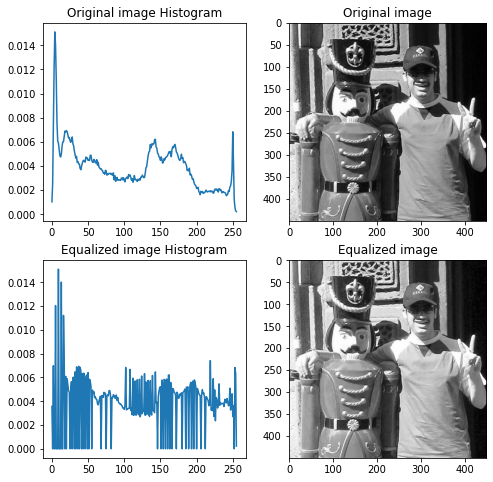

In [82]:
Y , h, H, sk = histeq(img)
fig = plt.figure(figsize = (8, 8))
fig.add_subplot(2, 2, 1)
plt.title("Original image Histogram")
plt.plot(h)
fig.add_subplot(2, 2, 2)
plt.title("Original image")
plt.imshow(img, cmap = 'gray')
fig.add_subplot(2, 2, 3)
plt.title("Equalized image Histogram")
plt.plot(H)
fig.add_subplot(2, 2, 4)
plt.title("Equalized image")
plt.imshow(Y, cmap = 'gray')

# Q3

In [4]:
def add_sp_noise(image, amount):
  row,col = image.shape
  s_vs_p = 0.5
  amount = amount/100
  out = np.copy(image)
  # Salt mode
  num_salt = np.ceil(amount * image.size * s_vs_p)
  coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
  out[coords] = 255
  # Pepper mode
  num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
  coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
  out[coords] = 0
  return out

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  del sys.path[0]


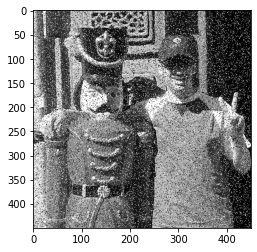

In [5]:
img = plt.imread('Hi.tif')
noisy_img = add_sp_noise(img, 20)
plt.imshow(noisy_img, cmap='gray')
plt.show()

In [6]:
def Hw_mean(image, n):
  (iH, iW) = image.shape[:2]
  kernel = np.ones((n, n), dtype="float") * (1.0 / (n * n))
  (kH, kW) = kernel.shape[:2]
  pad = (kW - 1) // 2
  image = cv2.copyMakeBorder(image, pad, pad, pad, pad,cv2.BORDER_REPLICATE)
  output = np.zeros((iH, iW), dtype="float32")
  for y in np.arange(pad, iH + pad):
    for x in np.arange(pad, iW + pad):
      roi = image[y - pad:y + pad + 1, x - pad:x + pad + 1]
      k = (roi * kernel).sum()
      output[y - pad, x - pad] = k
  output = rescale_intensity(output, in_range=(0, 255))
  output = (output * 255).astype("uint8")
  return output

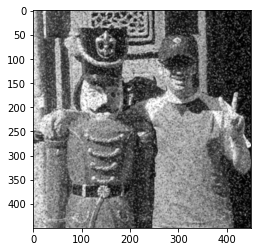

In [10]:
out = Hw_mean(noisy_img, 3)
plt.imshow(out, cmap='gray')

In [28]:
def Hw_median(image, n):
  (iH, iW) = image.shape[:2]
  kernel = np.ones((n, n))
  (kH, kW) = kernel.shape[:2]
  pad = (kW - 1) // 2
  image = cv2.copyMakeBorder(image, pad, pad, pad, pad,cv2.BORDER_REPLICATE)
  output = np.zeros((iH, iW), dtype="float32")
  for y in np.arange(pad, iH + pad):
    for x in np.arange(pad, iW + pad):
      roi = image[y - pad:y + pad + 1, x - pad:x + pad + 1]
      k = (roi * kernel)
      output[y - pad, x - pad] = np.median(k)
  output = rescale_intensity(output, in_range=(0, 255))
  output = (output * 255).astype("uint8")
  return output

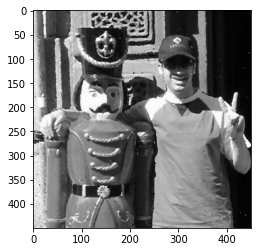

In [29]:
out = Hw_median(noisy_img,3)
plt.imshow(out, cmap='gray')